In [1]:
import yaml
import os
import datetime
import numpy
import csv
import pickle
from matplotlib import pyplot as plt 
import statistics 

In [2]:
with open('ab1stInnings.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    ab1stInnings = unpickler.load() 
    file.close()
with open('cd1stInnings.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    cd1stInnings = unpickler.load() 
    file.close()
with open('dataofallmatchesinfirstfiveyears.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    matches1st5yrs = unpickler.load() 
    file.close()

In [3]:
with open('SafeScoreBatsmen1stInnings.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    SafeScoreBatsmen = unpickler.load() 
    file.close()
with open('safeScoreBowler1stInnings.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    safeScoreBowler = unpickler.load() 
    file.close()
with open('safeWicketBatsmen1stInnings.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    safeWicketBatsmen = unpickler.load() 
    file.close()
with open('safeWicketBowler1stInnings.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    safeWicketBowler = unpickler.load() 
    file.close()

In [4]:
with open('maxScore1stInnings.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    maxScore = unpickler.load() 
    file.close()
with open('maxWicket1stInnings.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    maxWicket = unpickler.load() 
    file.close()

with open('minScore1stInnings.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    minScore = unpickler.load() 
    file.close()
with open('minWicket1stInnings.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    minWicket = unpickler.load() 
    file.close()

In [90]:
matchNo=0
batProbList, bowlProbList=[],[]
# batbatProbList,aaProbList,bbProbList,matchNos=[],[],[],[]
# bowlbowlProbList,ccProbList,ddProbList=[],[],[]
# plt.figure(figsize=(25, 10)) 
# for matchNo in range(len(matches1st5yrs)):
#     batProbList,aProbList,bProbList,cProbList,dProbList,bowlProbList,P,remWicket=[],[],[],[],[],[],[],[]
#     if len(matches1st5yrs[matchNo]['ourData'])<120:
#         continue
# #     if matchNo<210:
# #         continue
#     matchNos.append(matchNo)
for p in range(119,-1,-1):
    ballData=matches1st5yrs[matchNo]['ourData'][p]

    batstate=''
    if ballData['totalrunscount']>=SafeScoreBatsmen[p]:
        batstate+='a1'
    else:
        batstate+='a2'
    if ballData['wicketsremaining']>=safeWicketBatsmen[p]:
        batstate+='b1'
    else:
        batstate+='b2'


    bowlstate=''
    if ballData['totalrunscount']<=safeScoreBowler[p]:
        bowlstate+='c1'
    else:
        bowlstate+='c2'
    if ballData['wicketsremaining']<=safeWicketBowler[p]:
        bowlstate+='d1'
    else:
        bowlstate+='d2'



#     print(120-p,"actual",ballData['totalrunscount'],\
#           "safeScoreBat",SafeScoreBatsmen[p],"safeScoreBowl",safeScoreBowler[p],\
#           "safeWicketBat",safeWicketBatsmen[p],"safeWicketBowl",safeWicketBowler[p],\
#           "maxScore",maxScore[p],"minScore",minScore[p],\
#           "maxWicket",maxWicket[p],"minWicket",minWicket[p],)

#     print(120-p,ballData,batstate,ab1stInnings[p][batstate],bowlstate,cd1stInnings[p][bowlstate])


    dist={}

    if 'a1' in batstate:
        dist['a1']=0 if maxScore[p]==SafeScoreBatsmen[p] else \
        round((ballData['totalrunscount']-SafeScoreBatsmen[p])/(maxScore[p]-SafeScoreBatsmen[p]),2)
        aProbList.append(dist['a1'])
    if 'a2' in batstate:
        dist['a2']=0 if SafeScoreBatsmen[p]==minScore[p] else \
        round((-1)*(SafeScoreBatsmen[p]-ballData['totalrunscount'])/(SafeScoreBatsmen[p]-minScore[p]),2)
        aProbList.append(dist['a2'])
    if 'b1' in batstate:
        dist['b1']=0 if maxWicket[p]==safeWicketBatsmen[p] else \
        round((ballData['wicketsremaining']-safeWicketBatsmen[p])/(maxWicket[p]-safeWicketBatsmen[p]),2)
        bProbList.append(dist['b1'])
    if 'b2' in batstate:
        dist['b2']=0 if safeWicketBatsmen[p]==minWicket[p] else \
        round((-1)*(safeWicketBatsmen[p]-ballData['wicketsremaining'])/(safeWicketBatsmen[p]-minWicket[p]),2)
        bProbList.append(dist['b2'])

    if 'c1' in bowlstate:
        dist['c1']=0 if safeScoreBowler[p]==minScore[p] else \
        round((safeScoreBowler[p]-ballData['totalrunscount'])/(safeScoreBowler[p]-minScore[p]),2)
        cProbList.append(dist['c1'])
    if 'c2' in bowlstate:
        dist['c2']=0 if maxScore[p]==safeScoreBowler[p] else \
        round((-1)*(ballData['totalrunscount']-safeScoreBowler[p])/(maxScore[p]-safeScoreBowler[p]),2)
        cProbList.append(dist['c2'])
    if 'd1' in bowlstate:
        dist['d1']=0 if safeWicketBowler[p]==minWicket[p] else \
        round((safeWicketBowler[p]-ballData['wicketsremaining'])/(safeWicketBowler[p]-minWicket[p]),2)
        dProbList.append(dist['d1'])
    if 'd2' in bowlstate:
        dist['d2']=0 if maxWicket[p]==safeWicketBowler[p] else \
        round((-1)*(ballData['wicketsremaining']-safeWicketBowler[p])/(maxWicket[p]-safeWicketBowler[p]),2)
        dProbList.append(dist['d2'])
#     print(dist)

    a,b,c,d=batstate[:2],batstate[2:],bowlstate[:2],bowlstate[2:]
    batProb1=ab1stInnings[p][batstate]*numpy.sqrt((1+dist[a])*(1+dist[a])+(1+dist[b])*(1+dist[b]))
    bowlProb1=cd1stInnings[p][bowlstate]*numpy.sqrt((1+dist[c])*(1+dist[c])+(1+dist[d])*(1+dist[d]))

    batProb=round(batProb1/(batProb1+bowlProb1),2)
    bowlProb=round(1-batProb,2)

    P.append(120-p)
    remWicket.append(ballData['wicketsremaining']/10)
    batProbList.append(batProb)
    bowlProbList.append(bowlProb)
    print(120-p,batProb,bowlProb,"::",ballData['totalrunscount'],(10-ballData['wicketsremaining']))\
    #batstate,bowlstate,ab1stInnings[p][batstate],cd1stInnings[p][bowlstate]
#           "::",dist[a],dist[b],dist[c],dist[d],"::",2+dist[a]+dist[b],2+dist[c]+dist[d],\
#            "::")
print(matches1st5yrs[matchNo]['winLoss'])
print(ourdataforwinner[matchNo]['winner'])

1 0.49 0.51 :: 1 0
2 0.44 0.56 :: 1 0
3 0.44 0.56 :: 2 0
4 0.37 0.63 :: 2 0
5 0.35 0.65 :: 2 0
6 0.36 0.64 :: 3 0
7 0.32 0.68 :: 3 0
8 0.43 0.57 :: 7 0
9 0.47 0.53 :: 11 0
10 0.52 0.48 :: 17 0
11 0.59 0.41 :: 21 0
12 0.56 0.44 :: 21 0
13 0.52 0.48 :: 21 0
14 0.52 0.48 :: 21 0
15 0.54 0.46 :: 22 0
16 0.53 0.47 :: 26 0
17 0.55 0.45 :: 27 0
18 0.69 0.31 :: 27 0
19 0.84 0.16 :: 38 0
20 0.8 0.2 :: 39 0
21 0.83 0.17 :: 43 0
22 0.83 0.17 :: 43 0
23 0.81 0.19 :: 44 0
24 0.88 0.12 :: 50 0
25 0.91 0.09 :: 54 0
26 0.92 0.08 :: 55 0
27 0.94 0.06 :: 59 0
28 0.92 0.08 :: 59 0
29 0.91 0.09 :: 60 0
30 0.91 0.09 :: 60 0
31 0.91 0.09 :: 61 0
32 0.79 0.21 :: 61 1
33 0.78 0.22 :: 61 1
34 0.76 0.24 :: 61 1
35 0.75 0.25 :: 61 1
36 0.76 0.24 :: 61 1
37 0.76 0.24 :: 62 1
38 0.77 0.23 :: 63 1
39 0.77 0.23 :: 64 1
40 0.77 0.23 :: 66 1
41 0.78 0.22 :: 67 1
42 0.75 0.25 :: 68 1
43 0.74 0.26 :: 68 1
44 0.75 0.25 :: 69 1
45 0.74 0.26 :: 70 1
46 0.73 0.27 :: 71 1
47 0.74 0.26 :: 72 1
48 0.74 0.26 :: 73 1
49 0.73 0.2

In [92]:
with open('ourdata.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    ourdataforwinner = unpickler.load() 
    file.close()

In [93]:
batProblist,bowlProblist,P=[],[],[]
for p in range(119,-1,-1):
    batProblist.append(batProbList[p])
    bowlProblist.append(1-batProbList[p])
    
    P.append(p)

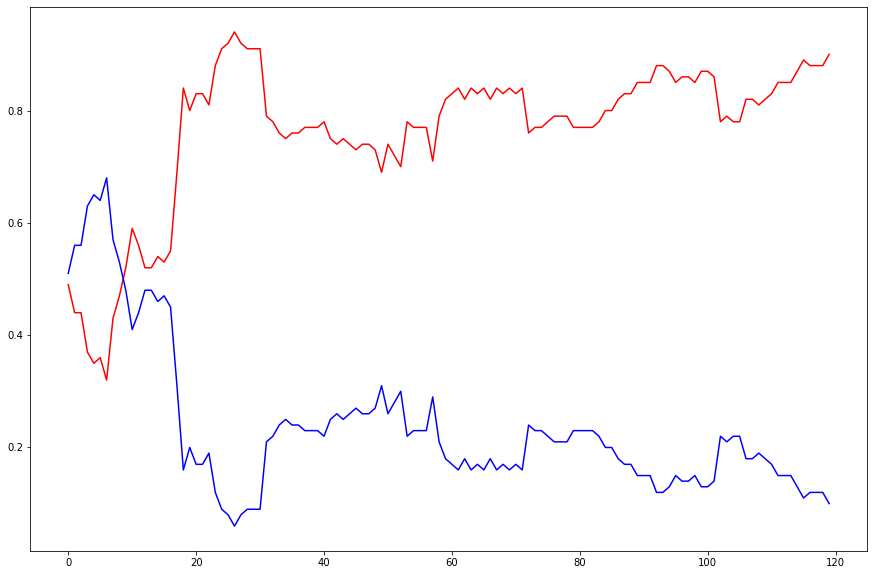

In [94]:
plt.figure(figsize=(15, 10)) 

plt.plot(P,batProblist,color='red')
plt.plot(P,bowlProblist,color='blue')
plt.show()